![title](https://1000marcas.net/wp-content/uploads/2020/01/logo-MINI.png)

# Analisis de Agencia de Mini-coopers
## Descripción del caso

La Compañía MINI COOPERS automóviles tiene agencias distribuidas en México en donde registran las compras de dichos modelos de automóviles por cliente, fecha, precio de venta y precio de lista. Todo este comportamiento aplica en las ciudades donde se encuentra localizadas de los diferentes estados de la República Mexicana.
## Objetivo de análisis
Qué dudas de negocios se pretenden resolver
Este caso se requiere de un analista que pueda manipular los datos capturados y tener en cuenta los siguientes puntos:
* ¿Cuál es la ciudad donde se vende más automóviles Mini-Coopers?
* ¿Cuál es la ciudad donde se vende menos automóviles Mini-Coopers?
* ¿En qué periodo del mes reciben más compras?
* ¿Cuál es modelo de automóvil que se vende más en Mexico?
* ¿Cuál es modelo de automóvil que se vende menos e Mexico?

## Datos ausentes
En este análisis no se muestra ningun dato ausente debido a que todos sus campos estan registrados.

## Análisis de caso atípicos:
No se encontraron variables atípicas ya que en este caso de análisis mostramos que la agencia está en el registro de datos que podemos ver como los precios reales y sobre los catálogos que se hicieron por cierto periodo. Es decir, los valores atípicos solamente se aplican para aquellos casos que tienen como variable categórica, un resultado expresado como no datos exactos.



In [1]:
# Se importan las librerías básicas para el trabajo de analítica de datos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Para que nuestros gráficos se integren a Jupyter Notebook
%matplotlib inline

In [2]:
# Cargar los datos de un archivo, y ponerlos en una variable de tipo dataframe de pandas

df = pd.read_csv("VentasMINI_Inicio.csv")

# La variable df representa al conjunto de datos completo.

# Volumen y tipo de datos

In [3]:
volumen=df.shape

print(f"\t\tTabla\nReglones:{volumen[0]}\nColumnas:{volumen[1]}")

		Tabla
Reglones:200
Columnas:10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_factura    200 non-null    object 
 1   agencia       200 non-null    object 
 2   modelo        200 non-null    object 
 3   transmisión   200 non-null    object 
 4   fecha_venta   200 non-null    object 
 5   precio_lista  200 non-null    float64
 6   precio_venta  200 non-null    float64
 7   año           200 non-null    int64  
 8   mes           200 non-null    object 
 9   año_mes       200 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 15.8+ KB


# Eliminar datos no utilizados


In [5]:
# Fecha_venta
del df['fecha_venta']
del df["id_factura"]

In [6]:
#Nueva informacion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   agencia       200 non-null    object 
 1   modelo        200 non-null    object 
 2   transmisión   200 non-null    object 
 3   precio_lista  200 non-null    float64
 4   precio_venta  200 non-null    float64
 5   año           200 non-null    int64  
 6   mes           200 non-null    object 
 7   año_mes       200 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.6+ KB


In [7]:
#Cambiamos los terminos originales en los valores de modelo por el que deberia de ser. Por ejemplo "MINI Cooper All Black(AUT)"
#Cambiamos por el valor "MINI Cooper All Black" por que el termino no tiene nada que ver ya que tenemos el campo Transmisión.

for valor in df['modelo'].tolist():
    tamaño=0
    tamaño=len(valor)
    if valor[tamaño-5:]=='(AUT)':
        df= df.replace([valor],valor[:tamaño-5])

In [8]:
#Agencia
def Generar_acomulativas(opcion):
    lista_columnas=df.columns.tolist()
    
    diccionario={
        "hi":df[opcion].value_counts()
    }
    df_frecuencias=pd.DataFrame(diccionario)

    df_frecuencias["fi"]=(df_frecuencias['hi'].values)/len(df)

    lista=[]
    sumador=0
    for valor in df_frecuencias["hi"].values:
        sumador=sumador+valor
        lista.append(sumador)
    df_frecuencias["HI"]=lista


    lista=[]
    sumador=0
    for valor in df_frecuencias["fi"].values:
        sumador=sumador+valor
        lista.append(sumador)
    df_frecuencias["FI"]=lista
    print("*"*30)
    print(df_frecuencias)
    print("\n\n")
    return df_frecuencias

print("\t\tNumero de operaciones de [agencia]")
Generar_acomulativas("agencia")
print("\t\tNumero de operaciones de [año]")
Generar_acomulativas("año")
print("\t\tNumero de operaciones de [año_mes]")
Generar_acomulativas("año_mes")
print("\t\tNumero de operaciones de [modelo]")
Generar_acomulativas("modelo")
print("\t\tNumero de operaciones de [transmision]")
Generar_acomulativas("transmisión")


		Numero de operaciones de [agencia]
******************************
           hi     fi   HI     FI
ZAPOPAN    62  0.310   62  0.310
LAS LOMAS  56  0.280  118  0.590
MONTERREY  43  0.215  161  0.805
REFORMA    39  0.195  200  1.000



		Numero de operaciones de [año]
******************************
       hi     fi   HI     FI
2012  127  0.635  127  0.635
2011   73  0.365  200  1.000



		Numero de operaciones de [año_mes]
******************************
             hi     fi   HI     FI
2012-12-DIC  14  0.070   14  0.070
2012-04-ABR  14  0.070   28  0.140
2012-03-MAR  13  0.065   41  0.205
2012-05-MAY  12  0.060   53  0.265
2012-06-JUN  11  0.055   64  0.320
2011-12-DIC  10  0.050   74  0.370
2012-07-JUL  10  0.050   84  0.420
2011-04-ABR  10  0.050   94  0.470
2012-11-NOV  10  0.050  104  0.520
2012-01-ENE  10  0.050  114  0.570
2012-09-SEP   9  0.045  123  0.615
2012-02-FEB   9  0.045  132  0.660
2012-08-AGO   9  0.045  141  0.705
2011-11-NOV   8  0.040  149  0.745
2011-06-JUN   7  

,hi,fi,HI,FI
ESTÁNDAR,101,0.505,101,0.505
AUTOMÁTICA,99,0.495,200,1.000


In [9]:

# Quitar margin para solo y unicamente eso
# *******************Esto es frecuencias Absolutas*******************
#Modelo-Agencia
modelo_agenciaAbsolutas=pd.crosstab(
    index=df['modelo'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
)
#Año-Agencia
anio_agenciaAbsolutas=pd.crosstab(
    index=df['año'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
)

#Año_mes-Agencia
anioMes_agenciaAbsolutas=pd.crosstab(
    index=df['año_mes'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
)

#Transmisión-Agencia
transmision_agenciaAbsolutas=pd.crosstab(
    index=df['transmisión'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
)

#Modelo-año
modelo_anioAbsolutas=pd.crosstab(
    index=df['modelo'],
    columns=df['año'],
    margins=True,
    margins_name="Total existente"
)

#Modelo_año_mes
modelo_anioMesAbsolutas=pd.crosstab(
    index=df['modelo'],
    columns=df['año_mes'],
    margins=True,
    margins_name="Total existente"
)

# ************************Esto es frecuencias Relativa***********************

#Modelo-Agencia
modelo_agenciaRelativas=pd.crosstab(
    index=df['modelo'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))
#Año-Agencia
anio_agenciaRelativas=pd.crosstab(
    index=df['año'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))
#Año_mes-Agencia
anioMes_agenciaRelativas=pd.crosstab(
    index=df['año_mes'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))
#Transmisión-Agencia
transmision_agenciaRelativas=pd.crosstab(
    index=df['transmisión'],
    columns=df['agencia'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))
#Modelo_año
modelo_anioRelativas=pd.crosstab(
    index=df['modelo'],
    columns=df['año'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))
#Modelo_año_mes
modelo_anioMesRelativas=pd.crosstab(
    index=df['modelo'],
    columns=df['año_mes'],
    margins=True,
    margins_name="Total existente"
).apply(lambda x: x/len(df))

#Escrbir la tabla que quieras mostrar a tiempo real
transmision_agenciaAbsolutas

agencia,LAS LOMAS,MONTERREY,REFORMA,ZAPOPAN,Total existente
transmisión,,,,,
AUTOMÁTICA,32,18,13,36,99
ESTÁNDAR,24,25,26,26,101
Total existente,56,43,39,62,200


In [10]:
#sumatoria, Promedio, Minimos o Maximos

result_modelo=df.pivot_table(index='modelo',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_agencia=df.pivot_table(index='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_anio=df.pivot_table(index='año',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_anio_mes=df.pivot_table(index='año_mes',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
result_transmision=df.pivot_table(index='transmisión',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')

#Para mostrar sum,mean,min o max necesitamos cambiar aggfunc="descripcion"
result_modelo=df.pivot_table(index='modelo',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')

#mostrar tabla
result_modelo

,precio_venta
modelo,
MINI Cooper All Black,12237923.52
MINI Cooper Bakerstreet,4990390.36
MINI Cooper Bayswater,6172021.26
MINI Cooper Chili,4955227.44
MINI Cooper Classic,9942926.10
MINI Cooper Green Park,4220063.84
MINI Cooper Hyde Park,3460148.94
MINI Cooper Oxford Street,5719877.10
MINI Cooper Pepper,6303498.86


In [11]:
#SUMATORIA DE MONTOS
result_agencia

,precio_venta
agencia,
LAS LOMAS,18120651.68
MONTERREY,13766046.06
REFORMA,12104383.60
ZAPOPAN,19982968.50
All,63974049.84


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   agencia       200 non-null    object 
 1   modelo        200 non-null    object 
 2   transmisión   200 non-null    object 
 3   precio_lista  200 non-null    float64
 4   precio_venta  200 non-null    float64
 5   año           200 non-null    int64  
 6   mes           200 non-null    object 
 7   año_mes       200 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.6+ KB


In [13]:
#filtro=(df["agencia"]=="MONTERREY") & (df["modelo"]=="MINI Cooper All Black")
#df1=df[filtro]
#df1.info
#df1['precio_venta

#agencia y modelo.
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#agencia y año-mes.
result_anioMesAgencia=df.pivot_table(index='año_mes',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#agencia y año.
result_anioAgencia=df.pivot_table(index='año',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#agencia y transmisión.
result_transmisionAgencia=df.pivot_table(index='transmisión',columns='agencia',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#modelo y año.
result_anioModelo=df.pivot_table(index='modelo',columns='año',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')
#modelo y año-mes.
result_anioMesModelo=df.pivot_table(index='modelo',columns='año_mes',values='precio_venta',aggfunc="sum",margins=True, margins_name='All')




#Para mostrar sum,mean,min o max necesitamos cambiar aggfunc="descripcion"
result_modeloAgencia=df.pivot_table(index='modelo',columns='agencia',values='precio_venta',aggfunc="max",margins=True, margins_name='All')


#Escribir la tabla que deseas solitcitar
result_modeloAgencia

agencia,LAS LOMAS,MONTERREY,REFORMA,ZAPOPAN,All
modelo,,,,,
MINI Cooper All Black,338500.0,338500.0,338500.0,338500.0,338500.0
MINI Cooper Bakerstreet,358900.0,323380.0,358900.0,323380.0,358900.0
MINI Cooper Bayswater,374400.0,328345.0,358900.0,374400.0,374400.0
MINI Cooper Chili,343712.0,343712.0,NaN,343712.0,343712.0
MINI Cooper Classic,328345.0,311610.0,328345.0,328345.0,328345.0
MINI Cooper Green Park,343712.0,343712.0,313500.0,313500.0,343712.0
MINI Cooper Hyde Park,332384.0,NaN,NaN,371995.0,371995.0
MINI Cooper Oxford Street,387360.0,371995.0,295850.0,387360.0,387360.0
MINI Cooper Pepper,371995.0,371995.0,339904.0,366336.0,371995.0


# Gráficas

<AxesSubplot:ylabel='transmisión'>

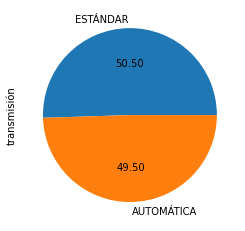

In [14]:

df['transmisión'].value_counts().plot(kind="pie",autopct="%.2f")